# Time Series Analysis

In this lab, we will practice to:
- Create time series objects
- Decompose a time series to trending, seasonal, and noise components
- Conduct autocorrelation analysis: plotting and interpreting correlograms
- Forecaste and understanding/ evaluating the forecasting models using [forecast package](https://cran.r-project.org/web/packages/forecast/index.html)


In [1]:
#required library
library(tidyverse)

# install.packages("forecast",repos = "https://cran.uni-muenster.de/")
library(forecast)


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1       ✔ purrr   0.3.3  
✔ tibble  2.1.3       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


## Time series object creation

In this section, we will examine some important arguments of the ***ts*** function, which is used to create time series object from a list of values

### Example

In this example, we will use the [**monthly milk production** dataset](https://rdrr.io/cran/fma/man/milk.html), which is also provided in the `data` folder. We will learn how to create different time series of monthly milk production which starts and ends at different months/years

In [3]:
#load the dataset
milk <- read.csv('data/monthly-milk-production-pounds-p.csv', header = TRUE)
#rename columns of the dataset
names(milk) <- c('month','production')
#view some first rows
head(milk)

month,production
<fct>,<int>
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727
1962-06,697


In [5]:
#create a time series starting from May 1962 and ending at June 1968
milk_ts = ts(milk$production,frequency = 12, start = 1962, end = c(1975, 12))

#in the above command, please note the following arguments in ts function
# the "frequency" argument: basically, this is the number of observations per time step,
#           when set to 4 and 12 the created time series will be printed out in quarterly and yearly format, respectively

# the "start" argument: can accept an integer or a list of 2 integer numbers,
#           this is the time of the first observation and (if 2 integer numbers is provided)
#           the staring element of the first observation

# the "end" argument: can accept an integer or a list of 2 integer numbers,
#           this is the time of the last observation and (if 2 integer numbers is provided)
#           the staring element of the last observation

#view the created series
milk_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1962,589,561,640,656,727,697,640,599,568,577,553,582
1963,600,566,653,673,742,716,660,617,583,587,565,598
1964,628,618,688,705,770,736,678,639,604,611,594,634
1965,658,622,709,722,782,756,702,653,615,621,602,635
1966,677,635,736,755,811,798,735,697,661,667,645,688
1967,713,667,762,784,837,817,767,722,681,687,660,698
1968,717,696,775,796,858,826,783,740,701,706,677,711
1969,734,690,785,805,871,845,801,764,725,723,690,734
1970,750,707,807,824,886,859,819,783,740,747,711,751
1971,804,756,860,878,942,913,869,834,790,800,763,800


In [6]:
#create a time series starting from September 1965 and ending at September 1970
milk_ts = ts(milk$production,frequency = 12, start = c(1965, 9), end = c(1970, 9))
milk_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1965,,,,,,,,,589,561,640,656
1966,727,697,640,599,568,577,553,582,600,566,653,673
1967,742,716,660,617,583,587,565,598,628,618,688,705
1968,770,736,678,639,604,611,594,634,658,622,709,722
1969,782,756,702,653,615,621,602,635,677,635,736,755
1970,811,798,735,697,661,667,645,688,713,,,


### Exercise
Create time series of weekly high price of Apple from the dataset provided [here](https://www.nasdaq.com/market-activity/stocks/aapl/historical)

In [8]:
# Hint: use `parse_number` function in `readr` package for converting prices from character to numeric type

#YOUR CODE GOES HERE
library(readr)
url <- 'https://www.nasdaq.com/api/v1/historical/AAPL/stocks/2019-01-01/2019-11-28'
df  <- read_csv(url)
df$price_high <- parse_number(df$High)
head(df)
price_ts <- ts(df$price_high,frequency = 7, start = c(1, 1))
price_ts

Parsed with column specification:
cols(
  Date = col_character(),
  `Close/Last` = col_character(),
  Volume = col_double(),
  Open = col_character(),
  High = col_character(),
  Low = col_character()
)


Date,Close/Last,Volume,Open,High,Low,price_high
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
11/27/2019,$267.84,16386120,$265.58,$267.98,$265.31,267.980
11/26/2019,$264.29,26334880,$266.94,$267.16,$262.5,267.160
11/25/2019,$266.37,21029520,$262.71,$266.44,$262.52,266.440
11/22/2019,$261.78,16331260,$262.59,$263.18,$260.84,263.180
11/21/2019,$262.01,30348780,$263.69,$264.005,$261.18,264.005
11/20/2019,$263.19,26609920,$265.54,$266.083,$260.4,266.083


A Time Series:
  [1] 267.9800 267.1600 266.4400 263.1800 264.0050 266.0830 268.0000 267.4300
  [9] 265.7800 264.8800 264.7800 262.7900 262.4700 260.4400 260.3500 257.4900
 [17] 258.1900 257.8450 255.9300 249.1700 245.3000 249.7500 249.2500 246.7300
 [25] 244.8000 243.2400 242.2000 240.9900 237.5800 236.1500 235.2400 237.6500
 [33] 238.1342 237.6400 230.4400 227.7900 228.0600 229.9300 227.4900 220.9600
 [41] 223.5800 228.2200 224.5800 220.9600 220.9400 221.5000 222.4900 219.8400
 [49] 222.5600 223.7600 222.8500 220.8200 220.1300 220.7900 226.4200 223.7100
 [57] 216.7800 216.4400 214.4200 213.9700 209.4800 206.9800 210.4500 209.3200
 [65] 205.7200 208.5500 207.1900 212.0510 214.4350 213.6500 213.3500 212.7307
 [73] 207.1600 205.1400 206.4400 212.1400 202.0516 202.7600 203.5300 199.5600
 [81] 198.0670 198.6490 206.4300 218.0300 221.3700 210.1600 210.6400 209.7300
 [89] 209.2400 209.1500 208.9100 207.2300 206.5000 205.8800 205.0915 206.1100
 [97] 205.8700 204.0000 204.3900 203.7300 201.5100 201.4000 205.0800 204.4400
[105] 203.1323 204.4900 199.4950 201.5700 200.9900 199.2600 200.1600 200.8500
[113] 200.6100 199.8800 200.2900 194.9600 193.5863 196.7900 195.9700 196.0000
[121] 195.3700 191.9200 185.4700 184.9900 179.8300 177.9200 177.9900 179.2300
[129] 179.3500 180.5900 182.1400 180.5400 185.7100 188.0000 184.3490 190.9000
[137] 192.4689 191.7500 189.7000 189.4800 198.8500 201.6800 205.3400 207.4175
[145] 208.8400 211.8400 212.6500 215.3100 203.4000 205.9700 205.0000 207.7600
[153] 208.4800 207.7500 204.9400 204.1500 203.3800 201.3700 199.8500 200.1400
[161] 201.0000 200.7400 202.8500 200.2300 197.1000 196.3700 196.5000 194.4600
[169] 191.6800 190.0800 189.5590 189.7600 192.8800 191.9800 197.6900 196.3300
[177] 189.4900 188.9900 188.3900 187.3300 184.1000 183.3000 182.6700 179.1200
[185] 173.0700 174.4400 175.4900 176.0000 177.7500 175.1500 174.9100 175.0000
[193] 175.3000 175.8700 173.0000 172.3700 173.3200 171.4400 171.7000 171.2615
[201] 172.4800 171.0000 171.2100 170.6600 173.9400 175.5700 175.0800 171.6550
[209] 168.9800 169.0000 166.1500 158.1300 156.3300 158.1300 154.4800 155.1400
[217] 156.7300 157.8800 157.6600 155.8800 153.3900 151.2700 153.7000 153.9700
[225] 154.5300 151.8200 148.8300 148.5499 145.7200 158.8500

## Decomposition

In this section, we will use the datasets provided in [**fpp**](https://cran.r-project.org/web/packages/fpp/index.html) package, which are used for illustration in this very userful [book](https://otexts.com/fpp2/) for forescasting

In [9]:
#install the package
#install.packages("fpp",repos = "https://cran.uni-muenster.de/")
#load the package
library(fpp)
#view datasets provided in the package
data(package = 'fpp')

Loading required package: fma

Attaching package: ‘fma’

The following object is masked _by_ ‘.GlobalEnv’:

    milk

Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: tseries


### Example
In this example, we will inspect the dataset **Electrical equipment manufactured in the Euro area**, which is provided in the **fpp** package in time series form: the **elecequip** time series object

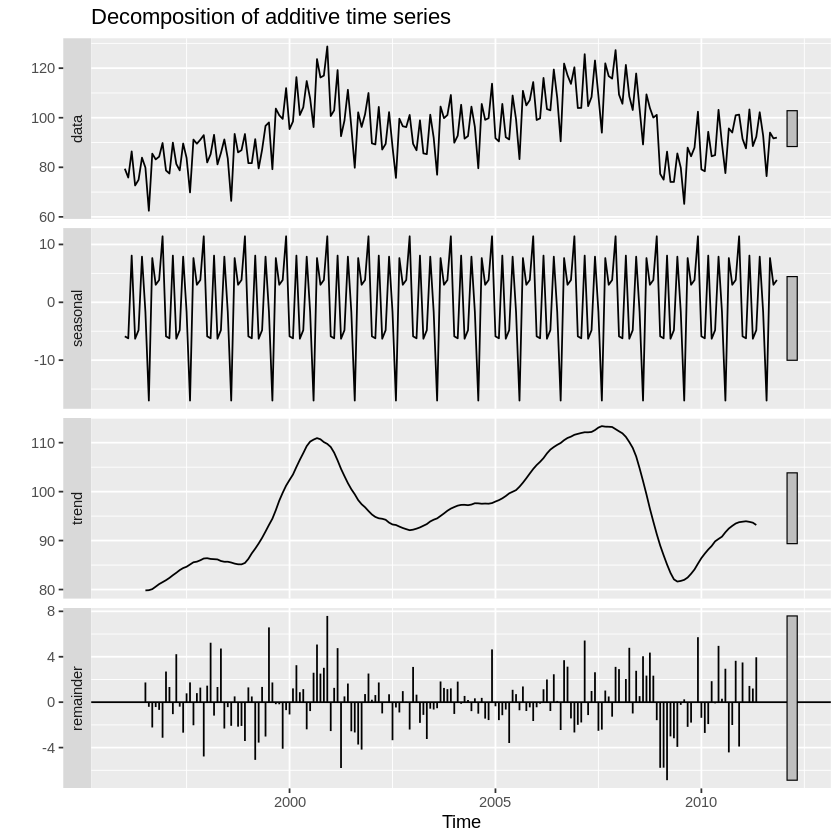

In [10]:
#decompose the time series into trend, seasonal, and error (remaiding/noise) parts
elecequip_components <- decompose(elecequip)
autoplot(elecequip_components)

**Question:** Any insight from the plots above?

### Exercise
Inspect the dataset **Quarterly retail trade: Euro area**, which is provided in the **fpp** package in time series form: the **euretail** time series object.

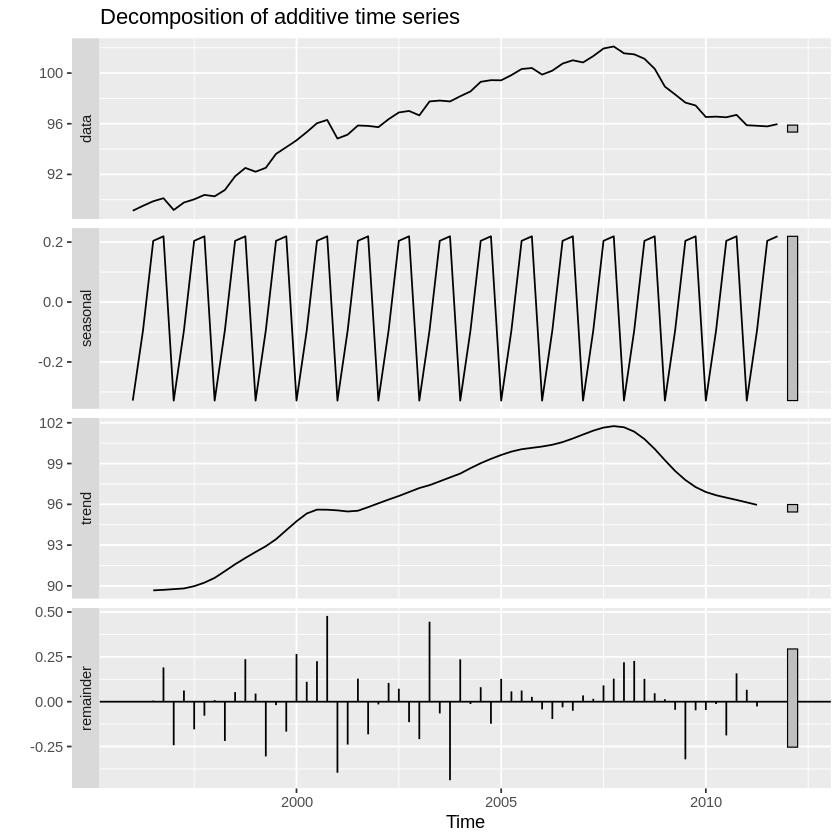

In [11]:
#YOUR CODE GOES HERE
euretail_components <- decompose(euretail)
autoplot(euretail_components)

## Autocorrelation analysis

In this section, we will learn to plot and interpret correlogram of a time series. We will again use the datasets provided in **fpp** package

### Example
Inspect the autocorrelation of **income** time series, which is provided in **usconsumption** dataset

,consumption,income
1970 Q1,0.6122769,0.496540
1970 Q2,0.4549298,1.736460
1970 Q3,0.8746730,1.344881
1970 Q4,-0.2725144,-0.328146
1971 Q1,1.8921870,1.965432
1971 Q2,0.9133782,1.490757


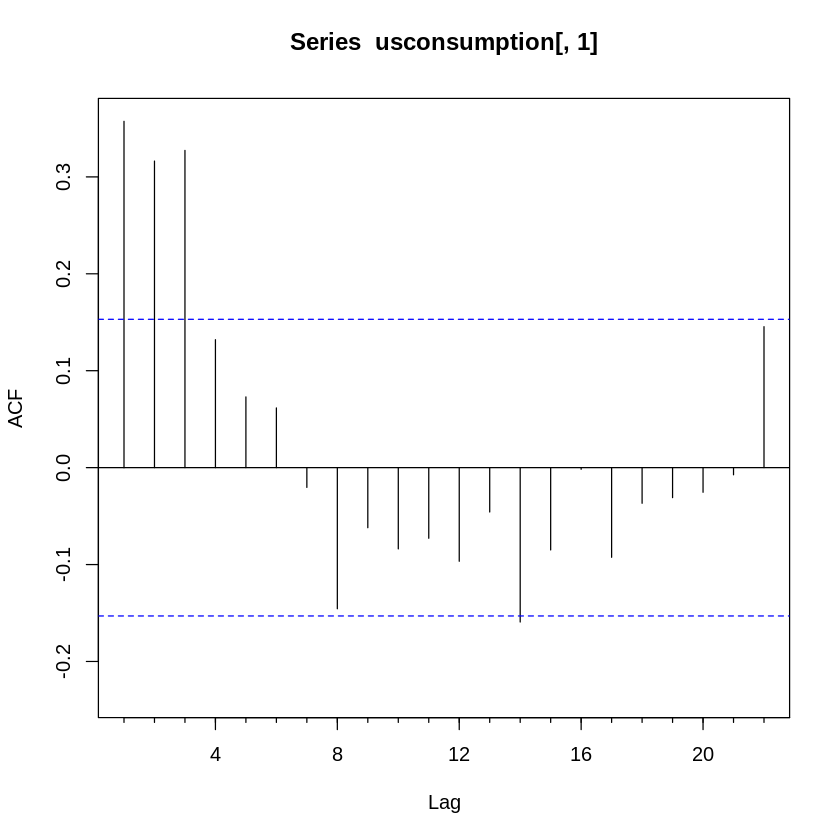

In [12]:
# view the dataset
head(usconsumption)
#compute and plot correlogram
Acf(usconsumption[,1])

**Question**

Why lag at 0 is always 1?

Is the time series autocorrelated?

At which values of **h** we can reject the hypothesis that the time series autocorrelates with lag **h**?

### Exercise
Inspect the autocorrelation of **Annual oil production in Saudi Arabia**, which is provided in **oil** dataset

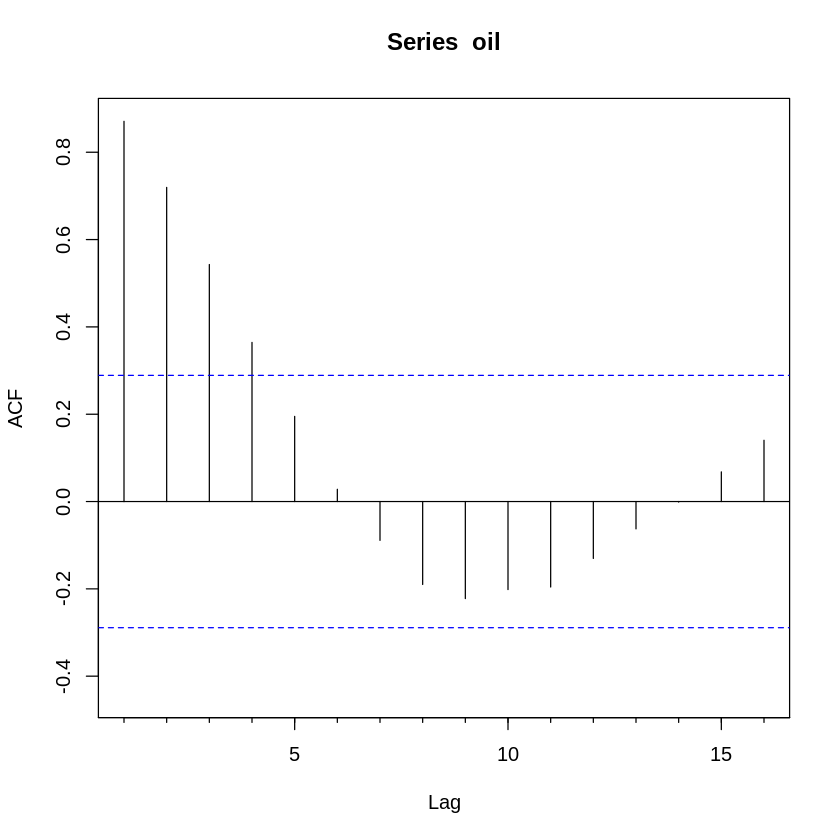

In [13]:
#YOUR CODE GOES HERE
Acf(oil)

## Forecasting with exponential smoothing model
In this section, we will again use the [**monthly milk production** dataset](https://rdrr.io/cran/fma/man/milk.html).

### Example

We will learn to fit a forecast model for monthly milk production based on exponential smoothing technique, and inspect the fitted model.

[1]  861.1094  812.9470  930.9791  946.5055 1017.0199  991.8259  951.4623
 [8]  910.3247  860.1092  862.4694  822.6806  863.0984

List of 9
 $ fitted      : Time-Series [1:156, 1:4] from 1963 to 1976: 6.39 6.33 6.48 6.51 6.61 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "xhat" "level" "trend" "season"
 $ x           : Time-Series [1:168] from 1962 to 1976: 6.38 6.33 6.46 6.49 6.59 ...
 $ alpha       : Named num 0.559
  ..- attr(*, "names")= chr "alpha"
 $ beta        : Named num 0
  ..- attr(*, "names")= chr "beta"
 $ gamma       : Named num 0.943
  ..- attr(*, "names")= chr "gamma"
 $ coefficients: Named num [1:14] 6.78623 0.00199 -0.03001 -0.08956 0.04402 ...
  ..- attr(*, "names")= chr [1:14] "a" "b" "s1" "s2" ...
 $ seasonal    : chr "additive"
 $ SSE         : num 0.0213
 $ call        : language HoltWinters(x = log(milk_ts))
 - attr(*, "class")= chr "HoltWinters"


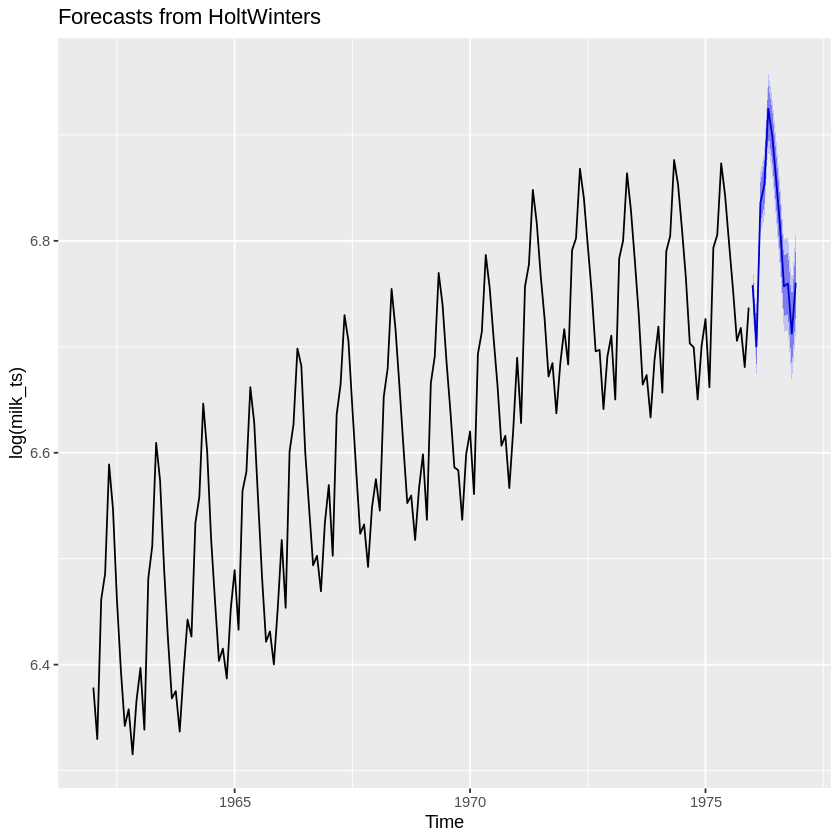

In [14]:
#load dataset
milk <- read.csv('data/monthly-milk-production-pounds-p.csv', header = TRUE)
names(milk) <- c('month','production')
#create a time series object
milk_ts = ts(milk$production,frequency = 12, start = 1962)
#fit a exponential smoothing model
milk_smoothed <- HoltWinters(x = log(milk_ts))
#forecast for the next 12 months
milk_forecast <- forecast(milk_smoothed, h = 12)
#views the forecast's mean
exp(c(milk_forecast$mean))
#plot the forecast
autoplot(milk_forecast)
#inspect model
str(milk_smoothed)

**Question:**


Why **exp(c(milk_forecast$mean))**?

What can we say from values of `alpha`, `beta`, and `gamma` of the fitted model?


### Exercise
Fit and inspect an exponential smoothing model for forecasting **Electrical equipment manufactured in the Euro area**, which is provided in the **fpp** package in time series form: the **elecequip** time series object

In [ ]:
#YOUR CODE GOES HERE

elecequip_smoothed <- HoltWinters(x = log(elecequip))
#forecast for the next 12 months
elecequip_forecast <- forecast(elecequip_smoothed, h = 12)
#views the forecast's mean
exp(c(elecequip_forecast$mean))
#plot the forecast
autoplot(elecequip_forecast)
#inspect model
str(elecequip_smoothed)

## Forecasting with ARIMA model
In this section, we will again use the [**monthly milk production** dataset](https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75).

[1] 855.2568 854.3142 859.4477 852.0701 854.3167 853.6325 853.8409 853.7774
 [9] 853.7967 853.7909 853.7927 853.7921

Series: milk_ts 
ARIMA(1,1,4) 

Coefficients:
          ar1     ma1     ma2      ma3      ma4
      -0.3045  0.2456  0.1500  -0.4257  -0.6493
s.e.   0.1158  0.0816  0.0545   0.0486   0.0614

sigma^2 estimated as 1380:  log likelihood=-839.88
AIC=1691.77   AICc=1692.29   BIC=1710.48

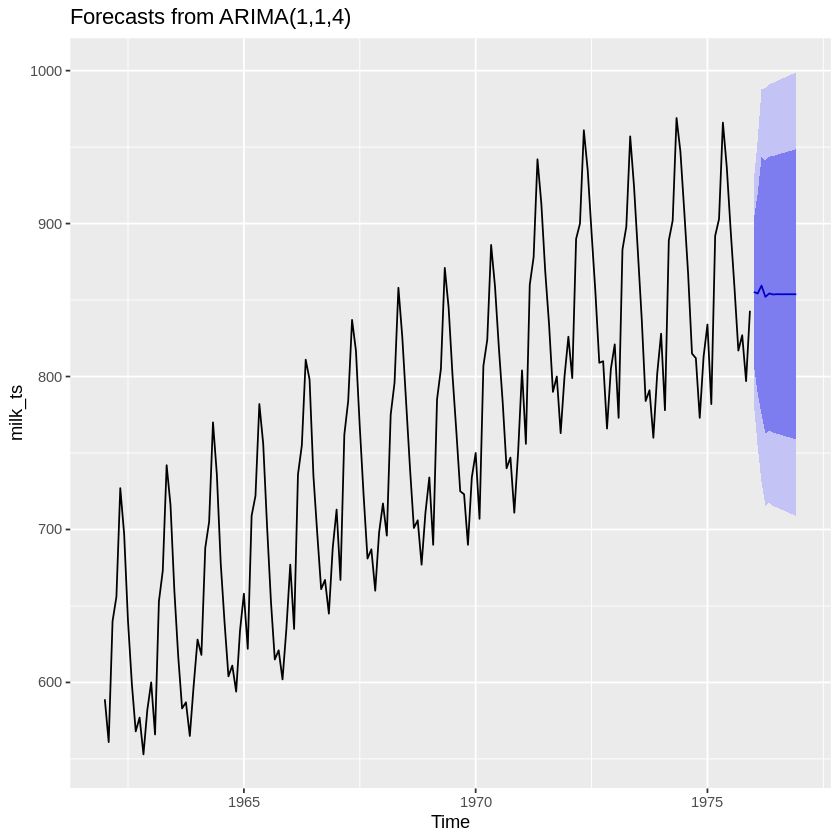

In [15]:
#load dataset
milk <- read.csv('data/monthly-milk-production-pounds-p.csv', header = TRUE)
names(milk) <- c('month','production')
#create a time series object
milk_ts = ts(milk$production,frequency = 12, start = 1962)

#fit a non-seasonal arima model with learnt parameters
milk_arima <- auto.arima(milk_ts, seasonal = FALSE)

#forecast for the next 12 months
milk_forecast <- forecast(milk_arima, h = 12)

#views the forecast's mean
c(milk_forecast$mean)

#plot the forecast
autoplot(milk_forecast)
#inspect model
milk_arima
#str(milk_arima)

**Question:**

What does  **ARIMA(x,y,z)** mean?

## Evaluating forecasting models

In this section, we learn to evaluate forecasting models time series. We will continue from the example in the previous section.

### Example

Measure the goodness of the milk_arima model obtained from above


	Ljung-Box test

data:  Residuals from ARIMA(1,1,4)
Q* = 339.72, df = 19, p-value < 2.2e-16

Model df: 5.   Total lags used: 24



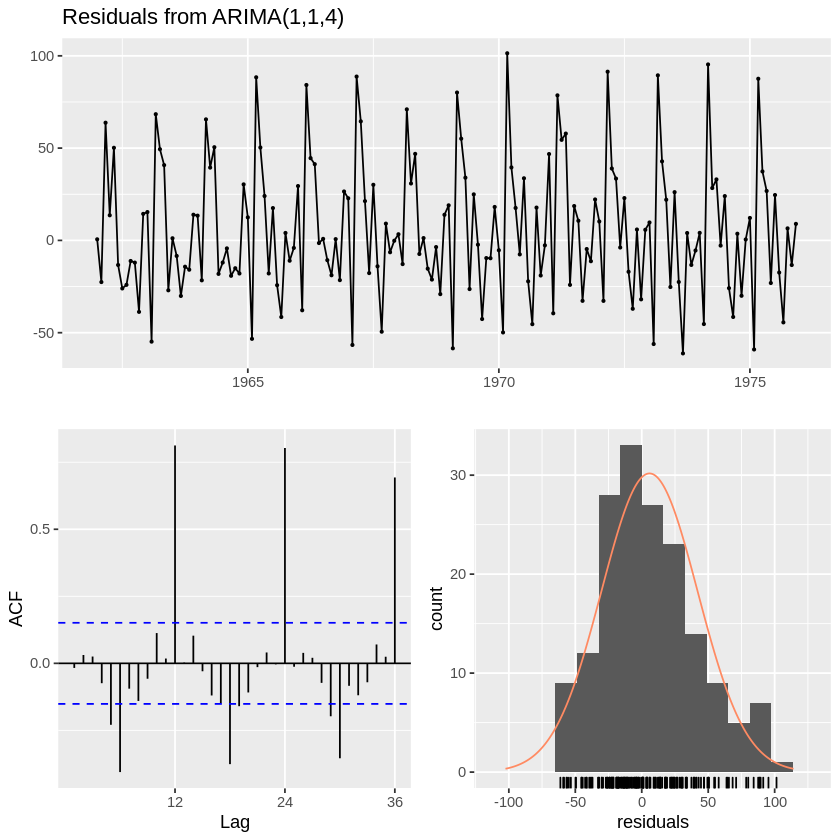

In [16]:
#previously, we have fit milk_arima as a non-seasonal arima model with learnt parameters
#milk_arima <- auto.arima(milk_ts, seasonal = FALSE)
checkresiduals(milk_arima)

**Question**

Is the above ***milk_arima*** good model for forecasting the monthly milk production?

**Exercise**

Re-train the milk_arima as a seasonal arima model with learnt parameters and evaluate its goodness

[1]  864.9773  817.7493  924.4056  937.4836 1000.6235  973.2165  931.8501
 [8]  892.2597  846.3679  851.5326  817.4931  859.7534

Series: milk_ts 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2204  -0.6214
s.e.   0.0748   0.0627

sigma^2 estimated as 53.42:  log likelihood=-530.15
AIC=1066.3   AICc=1066.46   BIC=1075.43

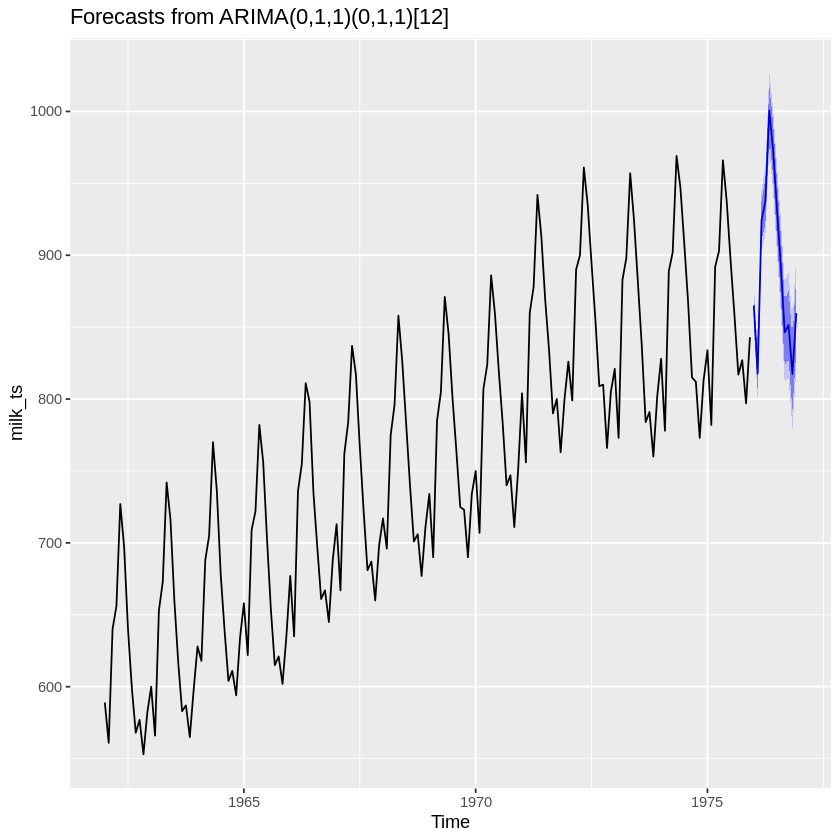


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.3, df = 22, p-value = 0.7466

Model df: 2.   Total lags used: 24



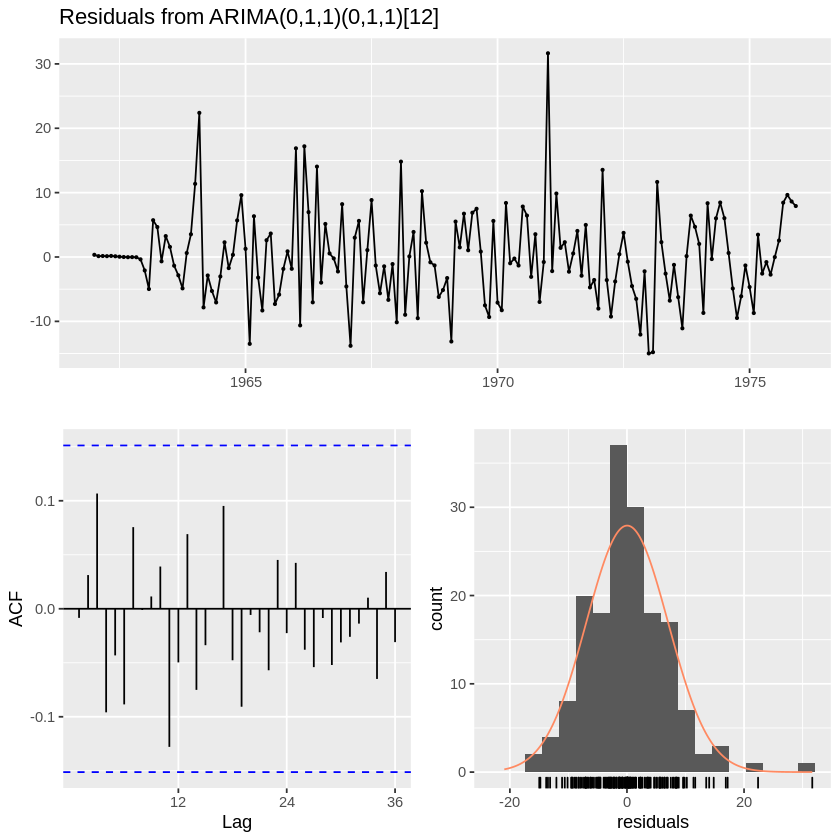

In [17]:
#YOUR CODE GOES HERE

#load dataset
milk <- read.csv('data/monthly-milk-production-pounds-p.csv', header = TRUE)
names(milk) <- c('month','production')
#create a time series object
milk_ts = ts(milk$production,frequency = 12, start = 1962)

#fit a non-seasonal arima model with learnt parameters
milk_arima <- auto.arima(milk_ts, seasonal = TRUE)

#forecast for the next 12 months
milk_forecast <- forecast(milk_arima, h = 12)

#views the forecast's mean
c(milk_forecast$mean)

#plot the forecast
autoplot(milk_forecast)
#inspect model
milk_arima
#str(milk_arima)

checkresiduals(milk_arima)

# References

List of packages and utilities for time series analysis with R: [CRAN Task View: Time Series Analysis](https://cran.r-project.org/web/views/TimeSeries.html)

Advanced time series analysis: [Forecasting: principles and practice](https://www.otexts.org/fpp)